# Classification 
by John Wenskovitch and Chris North, Virginia Tech

Topics: Decision Trees, Random Forests, KNN, SVM

Data:  sklearn.datasets.load_iris()


## Classification Problem

Should "?" be classified as an "X" or an "O"?

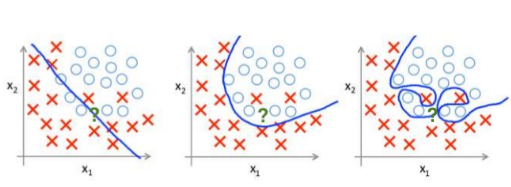

* Which class is a data instance a member of?
* Given data labeled with class memberships, learn to predict class of new data.
* Binary, Multi-class
* Examples...
* ML Algorithms:  Decision Trees, Random Forests, KNN, SVM, ...

### Machine Learning pipeline

1. Training
2. Testing
3. Prediction

<img src="https://labelyourdata.com/img/article-illustrations/training-data.png" width='400px'>



## Decision Trees

- Simple but powerful.
- Can perform both regression and classification tasks.
- A bit unstable...

### Process

- For each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node. 
- For evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision". 
- This process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.

### Example Scenario

A person asks you to lend them your car for a day, and you have to make a decision whether or not to lend them the car. There are several factors that help determine your decision:

1. Is this person a close friend or just an acquaintance? If the person is just an acquaintance, then decline the request; if the person is friend, then move to next step.
2. Is the person asking for the car for the first time? If they've bugged you before, decline, otherwise move to next step.
3. Was the car damaged last time they returned the car? If yes, decline the request; if no, lend them the car.

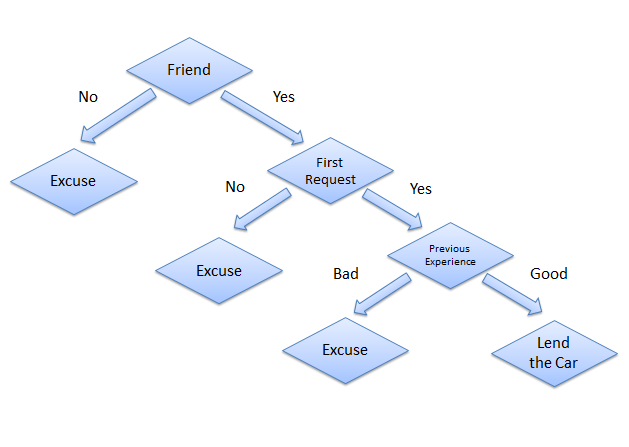

### Advantages of Decision Trees

1. They are inherintly Explainable.
1. Decision trees can be used to predict both continuous and discrete values i.e. they work well for both regression and classification tasks.
2. They require relatively less effort for training the algorithm.
3. They can be used to classify non-linearly separable data.
4. They're very fast and efficient compared to KNN and other classification algorithms.

### Python
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py


In [1]:
###
import pandas 
import numpy
import matplotlib.pyplot as plt

import sklearn.datasets 
import sklearn.tree 

iris = sklearn.datasets.load_iris()
#iris

In [38]:
###
x = pandas.DataFrame(iris.data, columns=iris.feature_names)
y = pandas.Series(iris.target, name='Species').map(lambda s: iris.target_names[s])
x


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


interactive visualization:
https://bl.ocks.org/Fil/6d9de24b31cb870fed2e6178a120b17d


In [3]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

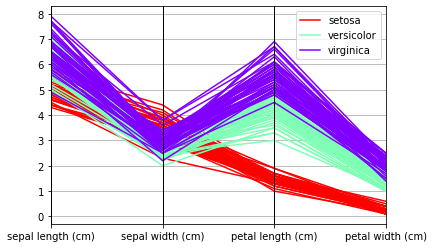

In [4]:
pandas.plotting.parallel_coordinates(x.join(y), "Species", colormap=plt.cm.rainbow_r)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

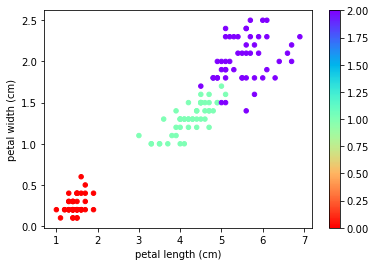

In [5]:
x.plot.scatter("petal length (cm)", "petal width (cm)", c=iris.target, cmap=plt.cm.rainbow_r, sharex=False)

In [6]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=3)
tree

DecisionTreeClassifier(max_depth=3)

In [7]:
tree.fit(x, y)

DecisionTreeClassifier(max_depth=3)

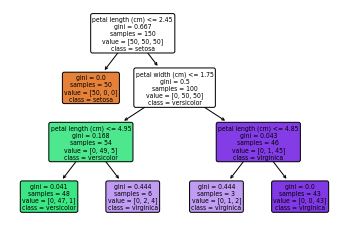

In [8]:
a = sklearn.tree.plot_tree(tree, filled=True, rounded=True,
                       feature_names=tree.feature_names_in_, class_names=tree.classes_)

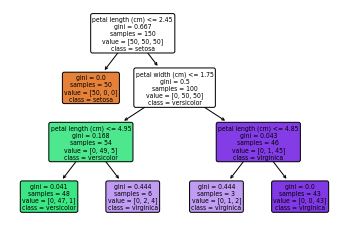

In [9]:
a = sklearn.tree.plot_tree(tree, filled=True, rounded=True,
                       feature_names=tree.feature_names_in_, class_names=tree.classes_)

### Gini impurity score

The gini score is a metric that quantifies the impurity of the node. 

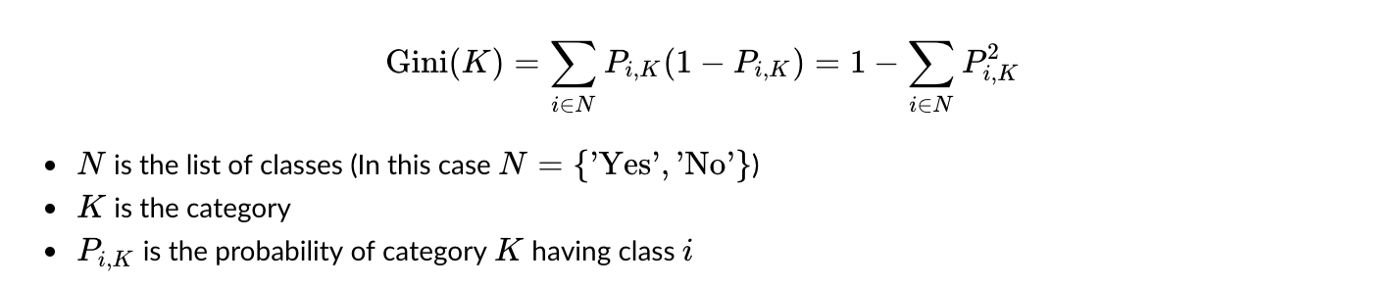

* Gini == 0 : the node is pure, that within that node only a single class of samples exist. 
* Gini > 0 : samples contained within are distributed into different classes.


In [10]:
1 - (49 / 54) ** 2 - (5 / 54) ** 2

0.1680384087791495

### Prediction

In [11]:
tree.predict([[5, 5, 1, 3] , [5, 5, 1, 1]])

C:\Anaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa'], dtype=object)

## Evaluating classifier models 

### Traning data vs Testing data

* Evaluating the prediction performance on the Training data is cheating (overfit)
* Separate out Training and Testing subsets of the data
    * 80-20 rule
* https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<img src="https://labelyourdata.com/img/article-illustrations/training-data-testing-data.png" width='300px'>


In [12]:
###
import sklearn.model_selection

(x_train, x_test, y_train, y_test) = sklearn.model_selection.train_test_split(x, y, test_size=0.5)
(x_train, x_test, y_train, y_test) 

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 111                6.4               2.7                5.3               1.9
 117                7.7               3.8                6.7               2.2
 149                5.9               3.0                5.1               1.8
 148                6.2               3.4                5.4               2.3
 99                 5.7               2.8                4.1               1.3
 ..                 ...               ...                ...               ...
 45                 4.8               3.0                1.4               0.3
 44                 5.1               3.8                1.9               0.4
 119                6.0               2.2                5.0               1.5
 29                 4.7               3.2                1.6               0.2
 100                6.3               3.3                6.0               2.5
 
 [75 rows x 4 columns],
      sepal length (cm)  s

In [13]:
y_test

11         setosa
128     virginica
132     virginica
107     virginica
82     versicolor
          ...    
146     virginica
32         setosa
124     virginica
144     virginica
63     versicolor
Name: Species, Length: 75, dtype: object

#### Train model on Training data


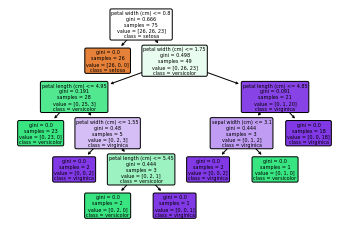

In [14]:
###
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10)
tree.fit(x_train, y_train)
a = sklearn.tree.plot_tree(tree, filled=True, rounded=True, 
                           feature_names=tree.feature_names_in_,
                           class_names=tree.classes_)

#### Test model on Testing data


In [15]:
y_pred = tree.predict(x_test)
y_pred = pandas.Series(y_pred, index=x_test.index, name="Predicted Species")
y_pred

11         setosa
128     virginica
132     virginica
107     virginica
82     versicolor
          ...    
146     virginica
32         setosa
124     virginica
144     virginica
63     versicolor
Name: Predicted Species, Length: 75, dtype: object

In [16]:
x_test.join(y_test).join(y_pred)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Predicted Species
11,4.8,3.4,1.6,0.2,setosa,setosa
128,6.4,2.8,5.6,2.1,virginica,virginica
132,6.4,2.8,5.6,2.2,virginica,virginica
107,7.3,2.9,6.3,1.8,virginica,virginica
82,5.8,2.7,3.9,1.2,versicolor,versicolor
...,...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,virginica,virginica
32,5.2,4.1,1.5,0.1,setosa,setosa
124,6.7,3.3,5.7,2.1,virginica,virginica
144,6.7,3.3,5.7,2.5,virginica,virginica


In [17]:
x_test.join(y_test).join(y_pred)[y_test != y_pred]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Predicted Species
106,4.9,2.5,4.5,1.7,virginica,versicolor


### Confusion Matrix

* Compare frequencies of *actual* vs *predicted*
    * actual on rows
    * predicted on cols
* https://en.wikipedia.org/wiki/Confusion_matrix

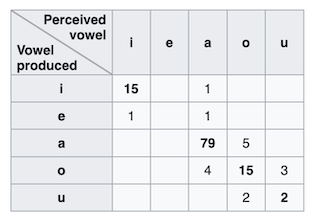


In [18]:
###
import sklearn.metrics

In [19]:
conf = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=tree.classes_)
conf = pandas.DataFrame(conf, index=tree.classes_, columns=tree.classes_)
conf

,setosa,versicolor,virginica
setosa,24,0,0
versicolor,0,24,0
virginica,0,1,26


### Precision & Recall

* Measures of classification accuracy
* https://en.wikipedia.org/wiki/Precision_and_recall

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" width='300px'>

$ Precision = \frac{TP}{TP + FP}$

$ Recall = \frac{TP}{TP + FN}$

$ F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$
(harmonic mean of precision and recall)

In [39]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.96      1.00      0.98        24
   virginica       1.00      0.96      0.98        27

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [21]:
20 / 23

0.8695652173913043

### Comparing models

#### Decision Tree Hyper-Parameters:

* **criterion:** How the impurity of a split will be measured. The default value is “gini” but you can also use “entropy” as a metric for impurity.

* **splitter:** This is how the decision tree searches the features for a split. 

* **max_depth:** This determines the maximum depth of the tree. 

* **min_samples_split:** The minimum number of samples a node must contain in order to consider splitting. 

* **min_samples_leaf:** The minimum number of samples needed to be considered a leaf node. 

* **max_features:** The number of features to consider when looking for the best split.

In [22]:
conf = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=tree.classes_)
conf = pandas.DataFrame(conf, index=tree.classes_, columns=tree.classes_)
conf

,setosa,versicolor,virginica
setosa,24,0,0
versicolor,0,24,0
virginica,0,1,26


In [23]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.96      1.00      0.98        24
   virginica       1.00      0.96      0.98        27

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



### Example

Decision tree for regression (predict a value rather than a class)

## Random Forests

We saw that decision trees are fairly unstable, dependent on the data, the height, and a variety of other parameters.  So why not create a bunch of decision trees and then let majority rule?

Process:
1.  Select random samples from a given dataset.
2.  Construct a decision tree for each sample and get a prediction result from each decision tree.
3.  Perform a vote for each predicted result.
4.  Select the prediction result with the most votes as the final prediction.

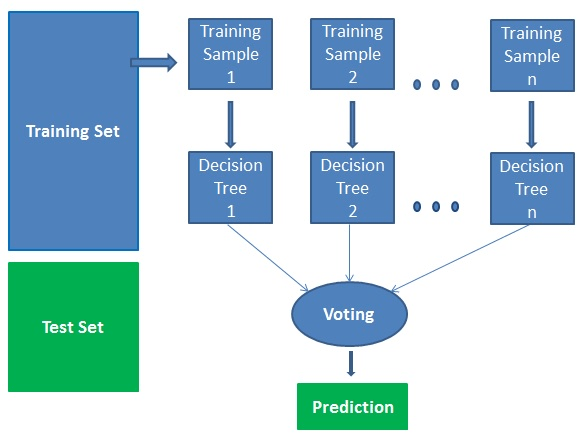

### Advantages:

1.  Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
2.  It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
3.  The algorithm can be used in both classification and regression problems.
4.  Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
5.  You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

### Disadvantages:

1.  A random forest is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
2.  The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.


In [24]:
###
from sklearn.ensemble import RandomForestClassifier


In [25]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=49)

In [26]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=49)

In [27]:
y_predrf = rf.predict(x_test)
y_predrf

array(['setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virgin

In [28]:
conf = sklearn.metrics.confusion_matrix(y_test, y_predrf, labels=tree.classes_)
conf = pandas.DataFrame(conf, index=tree.classes_, columns=tree.classes_)
conf

,setosa,versicolor,virginica
setosa,24,0,0
versicolor,0,24,0
virginica,0,1,26


In [29]:
print(sklearn.metrics.classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.96      1.00      0.98        24
   virginica       1.00      0.96      0.98        27

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



## k-Nearest Neighbors (kNN)

Based on similarity -- if data point *x* is near 7 points of Class1 and 4 points of Class2, it's likely that *x* also belongs to Class1.

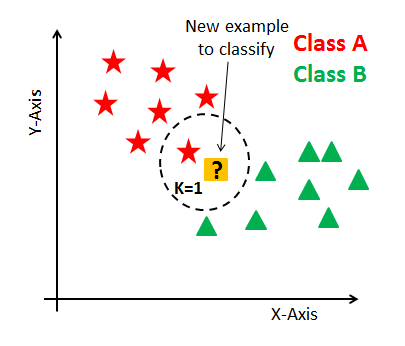

Non-parametric and lazy learning algorithm. 

**Non-parametric:** There is no assumption for underlying data distribution; the model structure determined from the dataset. 

**Lazy algorithm:** It does not need any training data points for model generation. All training data used in the testing phase.  This makes training faster and testing phase slower and costlier.  In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.




### Process:

1.  Measure distance
2.  Find closest labels
3.  Vote

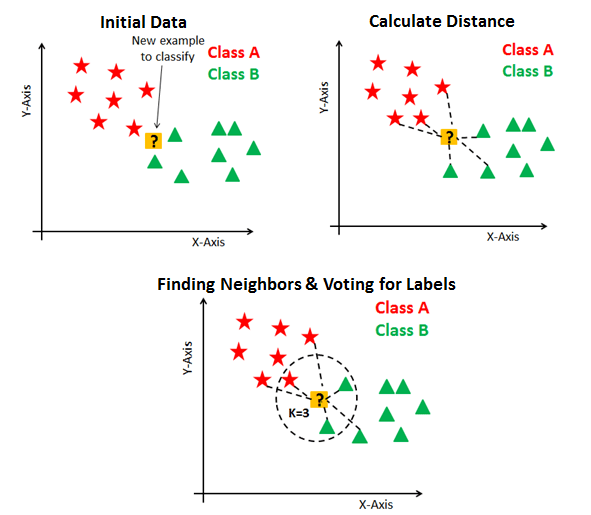


**Challenge:**  What is the distance threshold?

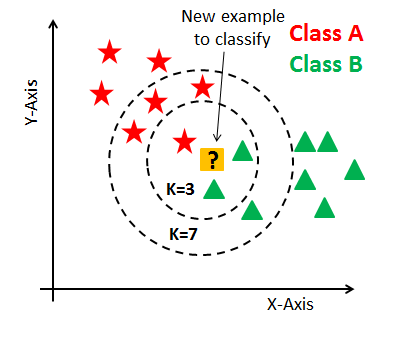

In [30]:
###
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

In [32]:
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [33]:
y_predknn = knn.predict(x_test)
y_predknn

array(['setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virgin

In [34]:
conf = sklearn.metrics.confusion_matrix(y_test, y_predknn, labels=tree.classes_)
conf = pandas.DataFrame(conf, index=tree.classes_, columns=tree.classes_)
conf

,setosa,versicolor,virginica
setosa,24,0,0
versicolor,0,23,1
virginica,0,1,26


In [35]:
print(sklearn.metrics.classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.96      0.96      0.96        24
   virginica       0.96      0.96      0.96        27

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



## Support Vector Machine (SVM)

Similar to regression, but we're trying to find the dividing line (or really, the dividing hyperplane) rather than the best fit line.

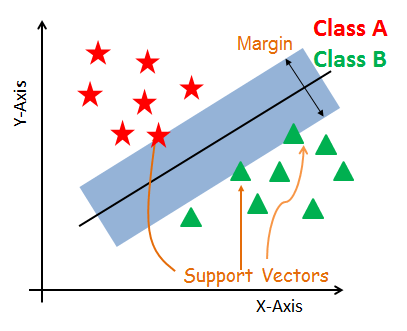



**Support Vector:**  The data points that are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane:**  A decision plane which separates between a set of objects having different class memberships.

**Margin:**  A gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

What if the two (or more) classes aren't separable by a hyperplane?

We change the kernel!

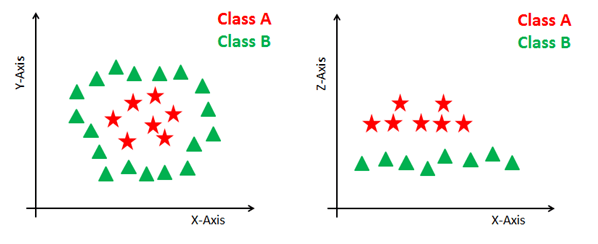

**Kernel:**  Transforms an input data space into the required form. 

SVMs use a technique called the "kernel trick":  the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it.